In [13]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('compare-tools/all_results.csv')

In [15]:
df.head()

,Tool,Scenario,RPS,CPU (%),MEM (kB),Time (s)
0,wrk,scenario-10-600-200,548330.62,651.5,3030,0.0
1,wrk,scenario-10-600-200,548330.62,668.1,3198,5.0
2,wrk,scenario-10-600-200,548330.62,658.4,3238,10.0
3,wrk,scenario-10-600-200,548330.62,647.8,3254,16.0
4,wrk,scenario-10-600-200,548330.62,661.0,3261,21.0


In [16]:
df.tail()

,Tool,Scenario,RPS,CPU (%),MEM (kB),Time (s)
2032,k6,scenario-600s-200,174310.009219,100.4,18191700,648.0
2033,k6,scenario-600s-200,174310.009219,100.6,18191700,653.0
2034,k6,scenario-600s-200,174310.009219,100.4,18191700,658.0
2035,k6,scenario-600s-200,174310.009219,100.4,18191704,664.0
2036,k6,scenario-600s-200,174310.009219,106.7,18191704,669.0


In [17]:
# for a given tool, plot the average CPU and Memory against the RPS

df_agg = df.groupby(['Tool', 'Scenario']).agg({
    "CPU (%)": "mean",
    "MEM (kB)": "mean",
    "RPS": "max"
}).reset_index()

print(df_agg)

      Tool             Scenario      CPU (%)      MEM (kB)            RPS
0   go-wrk    scenario-600-1000  3442.991379  3.060113e+06  149215.810000
1   go-wrk    scenario-600-1200  3471.387931  3.665079e+06  149738.250000
2   go-wrk     scenario-600-200  3453.862069  6.227483e+05  114801.690000
3   go-wrk     scenario-600-400  3439.206897  1.219196e+06  133800.930000
4   go-wrk     scenario-600-600  3472.568966  1.819241e+06  137276.260000
5   go-wrk     scenario-600-800  3473.681034  2.443682e+06  144000.660000
6       k6    scenario-600s-100  2379.227907  1.002403e+07  170814.107157
7       k6    scenario-600s-200  2404.865385  1.005805e+07  174310.009219
8       k6    scenario-600s-400  3062.829851  1.341888e+07  225313.698959
9       k6    scenario-600s-600  2977.496241  1.268166e+07  211290.872399
10     wrk   scenario-1-600-200   100.002586  2.739397e+03  163783.420000
11     wrk   scenario-1-600-400    99.995690  3.931198e+03  155283.160000
12     wrk   scenario-1-600-600    99.

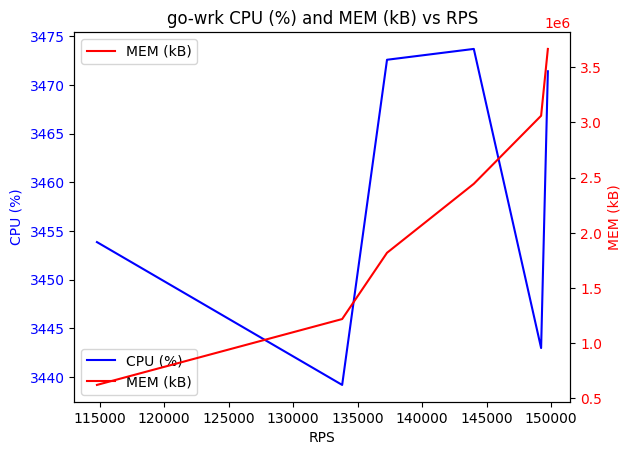

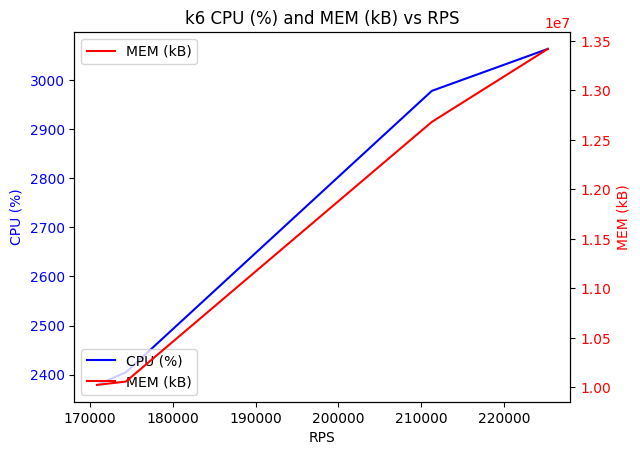

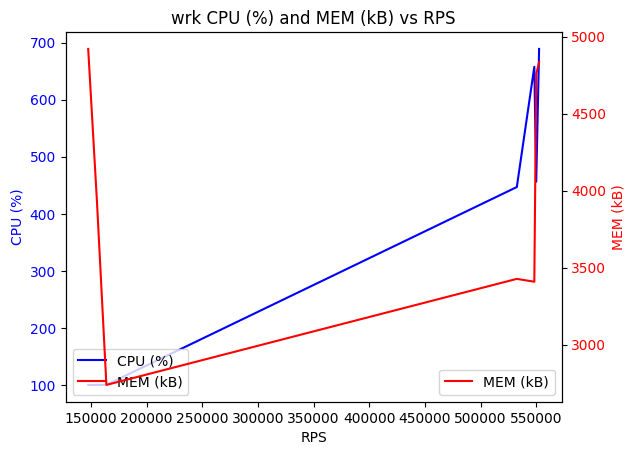

In [18]:
unique_tools = df_agg['Tool'].unique()

for tool in unique_tools:
    df_tool = df_agg[df_agg['Tool'] == tool]
    
    fig, ax1 = plt.subplots()

    sns.lineplot(data=df_tool, x='RPS', y='CPU (%)', ax=ax1, color='b', label='CPU (%)')
    ax1.set_xlabel('RPS')
    ax1.set_ylabel('CPU (%)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(False)  # Disable grid for ax1

    ax2 = ax1.twinx()
    sns.lineplot(data=df_tool, x='RPS', y='MEM (kB)', ax=ax2, color='r', label='MEM (kB)')
    ax2.set_ylabel('MEM (kB)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.grid(False)  # Disable grid for ax2

    plt.title(f'{tool} CPU (%) and MEM (kB) vs RPS')

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='lower left')

    plt.show()

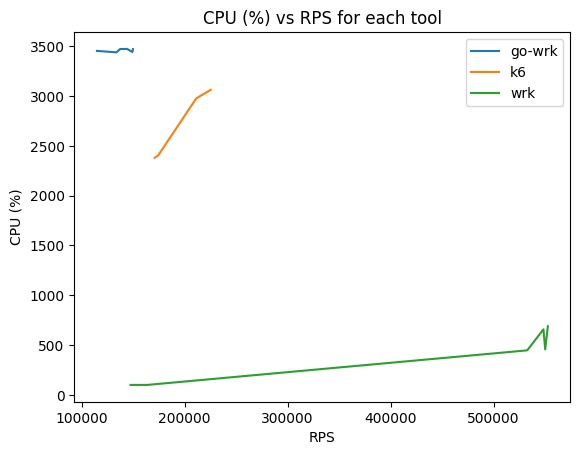

In [19]:
# compare unique tools 
# plot the average CPU against RPS for each tool

fig, ax1 = plt.subplots()

for tool in unique_tools:
    df_tool = df_agg[df_agg['Tool'] == tool]
    sns.lineplot(data=df_tool, x='RPS', y='CPU (%)', ax=ax1, label=tool)

ax1.set_xlabel('RPS')
ax1.set_ylabel('CPU (%)')
ax1.grid(False)  # Disable grid for ax1

plt.title('CPU (%) vs RPS for each tool')

plt.legend()

plt.show()

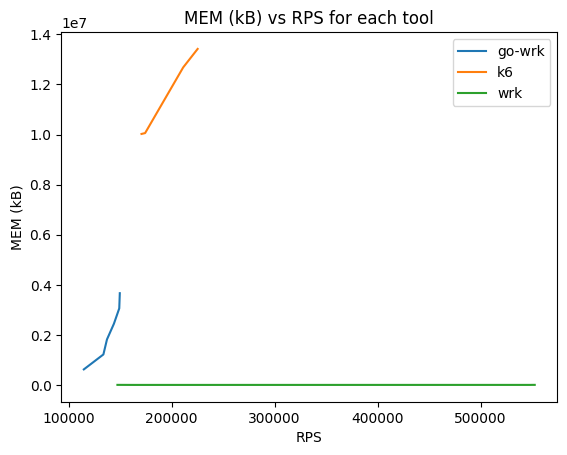

In [20]:
# plot the average MEM against RPS for each tool

fig, ax1 = plt.subplots()

for tool in unique_tools:
    df_tool = df_agg[df_agg['Tool'] == tool]
    sns.lineplot(data=df_tool, x='RPS', y='MEM (kB)', ax=ax1, label=tool)

ax1.set_xlabel('RPS')
ax1.set_ylabel('MEM (kB)')
ax1.grid(False)  # Disable grid for ax1

plt.title('MEM (kB) vs RPS for each tool')

plt.legend()

plt.show()
